# Homework 03


## Part 1 - Questions

### Question 1: 

What was the average record for every team in the leagues through 5 years?

* Who (population): Soccer/Football Fans
* What (subject, discipline): Soccer/Football 
* Where (location): England, Spain, Germany, and United States
* When (snapshot, longitudinal): 2015-2020
* How much data do you need to do the analysis/work: Not much, it is all in the dataset

### Question N: 

Is association football becoming too one-sided (Big teams over small teams)

Too little underdogs have been winning their leagues (Reign of Barcelona, Bayern Munchen, PSG, etc.)

* Who (population): Team owners, FIFA Officials, etc.
* What (subject, discipline): Association Football 
* Where (location): Worldwide
* When (snapshot, longitudinal): 2015-2020
* How much data do you need to do the analysis/work: Perhaps a bit more data (Monetary data)

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

Individual teams, sports leagues, FIFA, independent organizations, etc. 

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: Bundesliga, La Liga, MLS, & Premier League Data

2. Link to Data: https://www.kaggle.com/taranguyen/form-in-bundesliga-la-liga-mls-premier-league
3. Source / Origin: 
	* Author or Creator: Tara Nguyen
	* Publication Date: 12/14/2020
	* Publisher: Kaggle
	* Version or Data Accessed: 2/21/2021
4. License:  CC0 1.0 Universal (CC0 1.0) Public Domain Dedication
5. Can You Use this Data Set for Your Intended Use Case? For small statistical analyses, yet, but for larger products, I would need a larger datset.

## Format




### Overview

* Format: CSV
* Size: 25 KB
* Number of Records: 399



### Sample of Data




In [10]:
import csv
import numpy as np
with open('../data/raw/all-leaguetables.csv', 'r', encoding="UTF-8") as f:
    reader = csv.reader(f)
    columns = next(reader)
    col_indices = [0,1,2,3,-1]
    data_cols = [columns[i] for i in col_indices]
    raw_data = [line.split(',') for line in f]
    data = []
    for team in range(len(raw_data)):
        data.append([raw_data[team][i] for i in col_indices])
        data[team][2] = int(data[team][2])
        data[team][-1] = int(data[team][-1])


### Fields or Column Headers

* Field/Column 1: League: String
* Field/Column 2: Season: String
* Field/Column 3: Position: Integer
* Field/Column 4: Team: String
* Field/Column 5: FinalPoints: Integer

## Part 3 - Extract / Transform

TODO describe your process for extracting, transforming, cleaning your incoming data:

* I'll be using the above columns to find summary statistics regarding a team's position in the league for all the seasons (Mean), the average points per season each team had across their time in their respective leagues. I can use each team's datapoints to make plots, and measure other statistics.
* I will also be dropping the MLS entirely because, in 2017 or so, they decided to add more teams to the league, which makes it a bit more difficult for me to calculate all the stats.
* I think that FinalPoints and Position are both strings, but we'll convert these to integers.
* I'll use generators to divide each league into 5 seasons, Bundesliga has 18 teams while the other 2 have 20 each


In [114]:
import statistics as s
PL = [data[i] for i in range(len(data)) if data[i][0]=='Premier League']
Liga = [data[i] for i in range(len(data)) if data[i][0]=='La Liga']
Bundesliga = [data[i] for i in range(len(data)) if data[i][0]=='Bundesliga']
Leagues = [PL, Liga, Bundesliga]

team_names = []

for league in range(len(Leagues)):
    for team in Leagues[league]:
        team_names.append([team[3], team[0]])
# I needed to get the number of times each team appears in the data set, and make it easily accessible each time mean() is used, 
# so I made each team the key of a dictionary and the amount of times it appears thtough the seasons the value.
# I can then call this value everytime I need to get an average/mean. This is important for teams who only had 1 appearance instead
# of 5, like real madrid, barcelona, chelsea, etc. 
team_name = [team_names[names][0] for names in range(len(team_names))]
counts = dict()
for i in team_name:
    counts[i] = counts.get(i, 0) + 1

# Just giving the league gives you the mean per hear, but it'd be way more interesting to analyze a team's mean points and position for the time they
# were in the leagues. I've made it so you can do either, but I'll be analyzing solely the club's performances, not the league's. 
def mean(league, team=None):
    if league == 'Premier League':
        if team is None:
            Seasons = season(PL)
            season_list = []
            for i in Seasons:
                season_list.append(i)
            season_points = []
            for year in range(5):
                year_points = []
                for team in season_list[year]:
                    year_points.append(team[4])
                season_points.append(s.mean(year_points))
            return season_points
        else:
            team_data = []
            for season_team in range(len(PL)):
                if PL[season_team][3] == team:
                    team_data.append([PL[season_team][2],PL[season_team][4]])
            points = 0
            pos = 0
            for stat in team_data:
                points += stat[1]
                pos += stat[0]
            return [points/counts.get(team), pos/counts.get(team)]
    if league == 'Bundesliga':
        if team is None:
            Seasons = season(Bundesliga)
            season_list = []
            for i in Seasons:
                season_list.append(i)
            season_points = []
            for year in range(5):
                year_points = []
                for team in season_list[year]:
                    year_points.append(team[4])
                season_points.append(s.mean(year_points))
            return season_points
        else:
            team_data = []
            for season_team in range(len(Bundesliga)):
                if Bundesliga[season_team][3] == team:
                    team_data.append([Bundesliga[season_team][2],Bundesliga[season_team][4]])
            points = 0
            pos = 0
            for stat in team_data:
                points += stat[1]
                pos += stat[0]
            return [points/counts.get(team), pos/counts.get(team)]
    if league == 'La Liga':
        if team is None:
            Seasons = season(Liga)
            season_list = []
            for i in Seasons:
                season_list.append(i)
            season_points = []
            for year in range(5):
                year_points = []
                for team in season_list[year]:
                    year_points.append(team[4])
                season_points.append(s.mean(year_points))
            return season_points
        else:
            team_data = []
            for season_team in range(len(Liga)):
                if Liga[season_team][3] == team:
                    team_data.append([Liga[season_team][2],Liga[season_team][4]])
            points = 0
            pos = 0
            for stat in team_data:
                points += stat[1]
                pos += stat[0]
            return [points/counts.get(team), pos/counts.get(team)]
        
# Generator to partition a given league into 5 equal parts, denoting the 2015/2016, 2016/2017...2019/2020 seasons
def season(league):
    n = int(len(league)/5)
    for i in range(0, len(league), n):
        yield league[i:i + n]
    
unique_team = [list(x) for x in set(tuple(x) for x in team_names)]

## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



In [115]:
La_Liga = [i for i in unique_team if i[1] == 'La Liga']
EPL = [i for i in unique_team if i[1] == 'Premier League']
BDL = [i for i in unique_team if i[1] == 'Bundesliga']

liga_means = []
for teams in range(len(La_Liga)):
    league = 'La Liga'
    team = La_Liga[teams][0] 
    liga_means.append([team, mean(league, team)])
    
epl_means = []
for teams in range(len(EPL)):
    league = 'Premier League'
    team = EPL[teams][0] 
    epl_means.append([team, mean(league, team)])

bdl_means = []
for teams in range(len(BDL)):
    league = 'Bundesliga'
    team = BDL[teams][0] 
    bdl_means.append([team, mean(league, team)])
print('\nEnglish Premier League\n')
for team in range(len(epl_means)):
    print('Team: ' + epl_means[team][0] + '\nAverage Points per season: '+ str(epl_means[team][1][0]) +
          '\nAverage finishing position per season: '+str(epl_means[team][1][1])+'\n'+'-'*20)
print('\nSpanish La Liga\n')
for team in range(len(liga_means)):
    print('Team: ' + liga_means[team][0] + '\nAverage Points per season: '+ str(liga_means[team][1][0]) +
          '\nAverage finishing position per season: '+str(liga_means[team][1][1])+'\n'+'-'*20)
print('\nGerman Bundesliga\n')
for team in range(len(bdl_means)):
    print('Team: ' + bdl_means[team][0] + '\nAverage Points per season: '+ str(bdl_means[team][1][0]) +
          '\nAverage finishing position per season: '+str(bdl_means[team][1][1])+'\n'+'-'*20)


English Premier League

Team: Sheffield United
Average Points per season: 54.0
Average finishing position per season: 9.0
--------------------
Team: Wolverhampton Wanderers
Average Points per season: 58.0
Average finishing position per season: 7.0
--------------------
Team: Manchester City
Average Points per season: 84.6
Average finishing position per season: 2.2
--------------------
Team: Fulham
Average Points per season: 26.0
Average finishing position per season: 19.0
--------------------
Team: Swansea City
Average Points per season: 40.333333333333336
Average finishing position per season: 15.0
--------------------
Team: Norwich City
Average Points per season: 27.5
Average finishing position per season: 19.5
--------------------
Team: West Ham United
Average Points per season: 48.0
Average finishing position per season: 11.4
--------------------
Team: Chelsea
Average Points per season: 70.2
Average finishing position per season: 4.6
--------------------
Team: Tottenham Hotspur
Ave

#### Dispersion

In [116]:
bdl_points = []
for team in range(len(bdl_means)):
    bdl_points.append(bdl_means[team][1][0])
liga_points = []
for team in range(len(liga_means)):
    liga_points.append(liga_means[team][1][0])
epl_points = []
for team in range(len(epl_means)):
    epl_points.append(epl_means[team][1][0])
print('Premier League Average Points per Season Standard Deviation = ' + str(s.stdev(epl_points)) + '\n\nLa Liga Average Points per Season Standard Deviation = '
      + str(s.stdev(liga_points)) + '\n\nBundesliga Average Points per Season Standard Deviation= ' + str(s.stdev(bdl_points)))

Premier League Average Points per Season Standard Deviation = 16.77402972884811

La Liga Average Points per Season Standard Deviation = 14.95790532206738

Bundesliga Average Points per Season Standard Deviation= 14.243442144453118


#### Ranges
If the above standard deviations are true, we can assume that the Premier League has the largest range of the three leagues, we'll see if that is true, on average.

In [117]:
bdl_points.sort()
bdl_max = bdl_points[-1]
bdl_min = bdl_points[1]
bdl_q75, bdl_q25 = np.percentile(bdl_points, [75 ,25])
epl_points.sort()
epl_max = epl_points[-1]
epl_min = epl_points[1]
epl_q75, epl_q25 = np.percentile(epl_points, [75 ,25])
liga_points.sort()
liga_max = liga_points[-1]
liga_min = liga_points[1]
liga_q75, liga_q25 = np.percentile(liga_points, [75 ,25])
leagues_minmax = [bdl_means, epl_means, liga_means]
mins = [bdl_min, liga_min, epl_min]
maxs = [bdl_max, liga_max, epl_max]
print('Bundesliga:\nRange = ' 
      + str(bdl_max-bdl_min) + '\nQ1 = ' + str(bdl_q25) + '\nQ3 = ' +str(bdl_q75) + '\nIQR = ' + str(bdl_q75-bdl_q25)+ '\n'+'-'*30+'\nPremier League:\nRange = ' 
      + str(epl_max-epl_min) + '\nQ1 = ' + str(epl_q25) + '\nQ3 = ' +str(epl_q75) + '\nIQR = ' + str(epl_q75-epl_q25)+'\n'+'-'*30+' \nLa Liga:\nRange = ' +
      str(liga_max-liga_min) + '\nQ1 = ' + str(liga_q25) + '\nQ3 = ' +str(liga_q75) + '\nIQR = ' + str(liga_q75-liga_q25)+'\n'+'-'*30)



Bundesliga:
Range = 62.8
Q1 = 36.916666666666664
Q3 = 47.35
IQR = 10.433333333333337
------------------------------
Premier League:
Range = 58.599999999999994
Q1 = 34.0
Q3 = 57.2
IQR = 23.200000000000003
------------------------------ 
La Liga:
Range = 55.599999999999994
Q1 = 37.5
Q3 = 53.9
IQR = 16.4
------------------------------


###  Analysis on Categorical Data

#### Frequency

In [110]:
teams_by_appearances = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}
for i in teams_by_appearances:
    print(i,'--->',teams_by_appearances[i])

Hull City ---> 1
Middlesbrough ---> 1
Cardiff City ---> 1
Fulham ---> 1
Sheffield United ---> 1
SD Huesca ---> 1
RCD Mallorca ---> 1
FC Nurnberg ---> 1
FC Union Berlin ---> 1
SC Paderborn 07 ---> 1
Aston Villa ---> 2
Norwich City ---> 2
Sunderland ---> 2
Huddersfield Town ---> 2
Wolverhampton Wanderers ---> 2
Rayo Vallecano ---> 2
Sporting Gijon ---> 2
CA Osasuna ---> 2
Girona FC ---> 2
Real Valladolid CF ---> 2
FC Ingolstadt 04 ---> 2
SV Darmstadt 98 ---> 2
Fortuna Dusseldorf ---> 2
Stoke City ---> 3
Swansea City ---> 3
West Bromwich Albion ---> 3
Brighton ---> 3
Deportivo La Coruna ---> 3
Granada CF ---> 3
Malaga CF ---> 3
UD Las Palmas ---> 3
Hamburger SV ---> 3
Hannover 96 ---> 3
VfB Stuttgart ---> 3
Newcastle United ---> 4
Burnley ---> 4
Getafe CF ---> 4
Levante UD ---> 4
CD Leganes ---> 4
Deportivo Alaves ---> 4
FC Koln ---> 4
RB Leipzig ---> 4
SC Freiburg ---> 4
Arsenal ---> 5
Bournemouth ---> 5
Chelsea ---> 5
Crystal Palace ---> 5
Everton ---> 5
Leicester City ---> 5
Liverpool 

#### Unique Values

In [123]:
print(len(teams_by_appearances), 'unique teams appear through 5 seasons at the Bundesliga, La Liga, and the Premier League')
for i in teams_by_appearances:
    print(i)

80 unique teams appear through 5 seasons at the Bundesliga, La Liga, and the Premier League
Hull City
Middlesbrough
Cardiff City
Fulham
Sheffield United
SD Huesca
RCD Mallorca
FC Nurnberg
FC Union Berlin
SC Paderborn 07
Aston Villa
Norwich City
Sunderland
Huddersfield Town
Wolverhampton Wanderers
Rayo Vallecano
Sporting Gijon
CA Osasuna
Girona FC
Real Valladolid CF
FC Ingolstadt 04
SV Darmstadt 98
Fortuna Dusseldorf
Stoke City
Swansea City
West Bromwich Albion
Brighton
Deportivo La Coruna
Granada CF
Malaga CF
UD Las Palmas
Hamburger SV
Hannover 96
VfB Stuttgart
Newcastle United
Burnley
Getafe CF
Levante UD
CD Leganes
Deportivo Alaves
FC Koln
RB Leipzig
SC Freiburg
Arsenal
Bournemouth
Chelsea
Crystal Palace
Everton
Leicester City
Liverpool
Manchester City
Manchester United
Southampton
Tottenham Hotspur
Watford
West Ham United
Athletic Bilbao
Atletico Madrid
Celta Vigo
FC Barcelona
Espanyol
Real Betis Balompie
Real Madrid
Real Sociedad
SD Eibar
Sevilla FC
Valencia CF
Villarreal CF
FSV Ma

## Part 5 - Visualizations



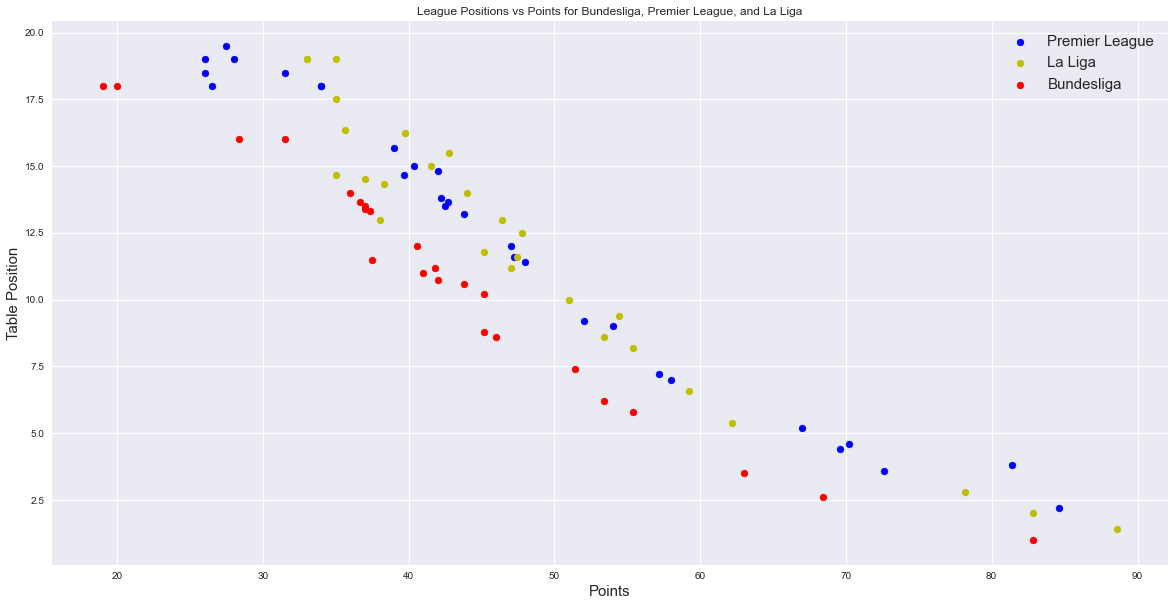

In [199]:
import matplotlib as mpl
import matplotlib.pyplot as plt
Leagues_Mean = [epl_means, bdl_means, liga_means]
Leagues_pos = []
Leagues_points = []
epl_pos = []
epl_points = []
for team in epl_means:
    epl_pos.append(team[1][1])
    epl_points.append(team[1][0])
bdl_pos = []
bdl_points = []
for team in bdl_means:
    bdl_pos.append(team[1][1])
    bdl_points.append(team[1][0])
liga_pos = []
liga_points = []
for team in liga_means:
    liga_pos.append(team[1][1])
    liga_points.append(team[1][0])
for league in Leagues_Mean:
    for team in league:
        Leagues_points.append(team[1][0])
        Leagues_pos.append(team[1][1])
fig = plt.figure(figsize = (20, 10)) 
plt.scatter(epl_points, epl_pos, color = 'b', label='Premier League')
plt.scatter(liga_points, liga_pos, color = 'y', label = 'La Liga')
plt.scatter(bdl_points, bdl_pos, color = 'r', label = 'Bundesliga')
plt.title('League Positions vs Points for Bundesliga, Premier League, and La Liga')
plt.xlabel('Points', size = 15)
plt.ylabel('Table Position', size = 15)
plt.legend(loc="best", prop={'size': 15})
plt.style.use('seaborn')

The scatterplot shows what we expected, a negative slope according to the points you have. 


What is interesting, however, is just how separate the furthest team to the right in the Bundesliga, Bayern Munich, is from the rest of the competition.

I believe the 2nd team with the lowest average table position in that league is Borrusia Dortmund and they don't even come close to reaching 75, let alone the 80 points on average Bayern has.

This can also be seen with the Standard deviations from each league, where the Bundesliga has the lowest value, and this can be attributed to the fact that Bayern IS sort of the outlier in that league. They're just that good.

The Premier League, though, is a bit more spread out than the other two leagues, also shown by the standard deviation it has.

46.9

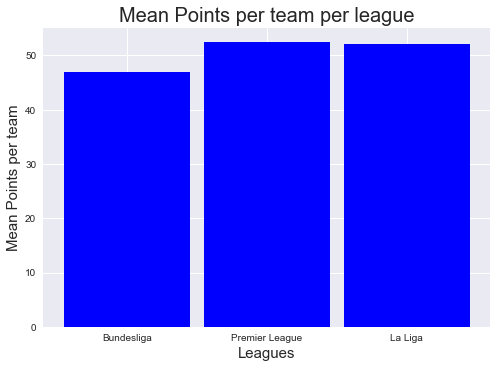

In [201]:
bdl_seasonmean = s.mean(mean('Bundesliga'))
epl_seasonmean = s.mean(mean('Premier League'))
liga_seasonmean = s.mean(mean('La Liga'))
data = {'Bundesliga':bdl_seasonmean, 'Premier League':epl_seasonmean, 'La Liga':liga_seasonmean}
league_name = list(data.keys()) 
league_mean = list(data.values()) 
plt.bar(league_name, league_mean, color ='b',  
        width = .9) 
plt.xlabel("Leagues", size = 15) 
plt.ylabel('Mean Points per team', size = 15)
plt.title('Mean Points per team per league', size = 20)

## Part 6 - Conclusion

* If it weren't for Bayern Munich in the Bundesliga, the league would actually be pretty competitive, the most competitive out of the three I measured.
* The Bundesliga has a lower overall season mean, this is attributed to the teams playing 34 matches instead of 38, like in the other two leages. However, I believe that the top teams hoard most of the points. (Followed)
* The 3rd Quartile of the Bundesliga is almost equal to the mean points per season, meaning that the mean is definitely skewed right by the bigger teams of Bayern, BVB, etc.
* The Premier League seems to be the most fair league of them all, or at least the most competitive. At least that's what I can tell from the scatterplot, where not too many teams are left behind and not one is ahead alone.

Overall, I had a fun time working with what I love most, Football and data, so I feel that these types of datasets and questions could make for an amazing research project soon.